
### Gradient Descent adalah metode untuk mencari nilai parameter (seperti w dan b) yang meminimalkan error (selisih antara prediksi dan data asli). Dalam SGD, kita update parameter setiap data point, bukan setelah semua data dihitung

m += error * x * learning_rate

b += error * learning_rate

🧠 Konsep Stochastic Gradient Descent (SGD)
SGD adalah varian dari Gradient Descent (GD) yang memperbarui parameter model (seperti bobot dan bias) berdasarkan satu data point saja dalam satu iterasi, bukan seluruh dataset.

✨ Perbedaan utama:

Batch GD	Seluruh dataset	Stabil, akurat	Lambat untuk dataset besar

SGD	Satu data point	Cepat, cocok untuk online learning	Lebih noisy, bisa fluktuatif

Mini-batch GD	Kelompok kecil data	Trade-off antara kecepatan dan stabilitas	Butuh tuning ukuran batch


In [ ]:
# Bentuk Umum 
# SGD: update untuk setiap data point
# SGD: update untuk setiap data point
for i in range(len(X)):
    # Prediksi untuk satu data point : 
    prediction = np.dot(X[i], w) + b  # gunakan X[i]

    # Hitung error
    error = prediction - y[i]

    # Hitung gradien
    grad_w = error * X[i]  # turunan terhadap w
    grad_b = error         # turunan terhadap b

    # Update parameter
    w -= learning_rate * grad_w
    b -= learning_rate * grad_b


In [1]:
import numpy as np

In [ ]:
# Data yang digunakan
X = np.array([[1.0], [2.0], [3.0], [4.0]])  # Fitur (input)
y = np.array([2.0, 4.0, 6.0, 8.0])         # Target (output)

# Inisialisasi parameter
w = np.array([0.0])  # bobot awal
b = 0.0              # bias awal
learning_rate = 0.01

# prediksi x= 5 ?

In [6]:
for i in range(len(X)):
    # Prediksi untuk satu data point
    prediction = np.dot(X[i], w) + b

    # Hitung error
    error = prediction - y[i]

    # Hitung gradien
    grad_w = error * X[i]
    grad_b = error

    # Update parameter
    w -= learning_rate * grad_w
    b -= learning_rate * grad_b

    # Cetak hasil tiap langkah
    print(f"Data ke-{i+1}: x={X[i][0]}, y={y[i]}")
    print(f"  Prediksi: {prediction:.4f}, Error: {error:.4f}")
    print(f"  Gradien w: {grad_w[0]:.4f}, Gradien b: {grad_b:.4f}")
    print(f"  Update w: {w[0]:.4f}, Update b: {b:.4f}\n")


Data ke-1: x=1.0, y=2.0
  Prediksi: 0.1176, Error: -1.8824
  Gradien w: -1.8824, Gradien b: -1.8824
  Update w: 0.0776, Update b: 0.0776

Data ke-2: x=2.0, y=4.0
  Prediksi: 0.2329, Error: -3.7671
  Gradien w: -7.5342, Gradien b: -3.7671
  Update w: 0.1530, Update b: 0.1153

Data ke-3: x=3.0, y=6.0
  Prediksi: 0.5742, Error: -5.4258
  Gradien w: -16.2773, Gradien b: -5.4258
  Update w: 0.3157, Update b: 0.1696

Data ke-4: x=4.0, y=8.0
  Prediksi: 1.4325, Error: -6.5675
  Gradien w: -26.2698, Gradien b: -6.5675
  Update w: 0.5784, Update b: 0.2352



In [9]:
x_test = np.array([5.0])
y_pred = np.dot(x_test, w) + b
print(f"Prediksi untuk x=5.0 adalah y={y_pred:.4f}")


Prediksi untuk x=5.0 adalah y=9.0923


🧠 Apa Itu Epoch?

Epoch adalah satu putaran penuh di mana model melihat seluruh dataset sekali.

Jadi, kalau kamu punya 7 data point dan epochs=1000, maka:

Model akan melakukan 1000 kali loop penuh terhadap semua 7 data point.

Artinya, total update parameter = 7 × 1000 = 7000 kali.

In [ ]:
# Loop luar (epoch): mengontrol berapa kali kita ingin model belajar dari seluruh dataset.
for epoch in range(epochs):         # Loop luar: ulangi proses training
    #Loop dalam (i): melakukan update parameter berdasarkan satu data point (itulah esensi dari SGD).
    for i in range(n_samples):      # Loop dalam: satu per satu data point
        ...

⚠️ Kenapa Perlu Banyak Epoch?
Karena:

Satu kali melihat data belum cukup untuk menemukan bobot optimal.

SGD bersifat noisy (karena update-nya per data), jadi perlu banyak pengulangan agar konvergen ke solusi yang baik.

In [44]:
import numpy as np

# Data sederhana: y = 2x
X = np.array([[1.0], [2.0], [3.0], [4.0]])
y = np.array([2.0, 4.0, 6.0, 8.0])

# Inisialisasi parameter
w = np.array([0.0])  # bobot awal
b = 0.0              # bias awal
learning_rate = 0.01
epochs = 20           # jumlah pengulangan seluruh data
# Untuk menyimpan error per epoch
loss_history = []

# Training dengan SGD
for epoch in range(epochs):
    print(f"=== Epoch {epoch+1} ===")
    total_loss = 0
    for i in range(len(X)):
        # Prediksi untuk satu data point
        prediction = np.dot(X[i], w) + b

        # Hitung error
        error = prediction - y[i]

        # Hitung gradien
        grad_w = error * X[i]
        grad_b = error

        # Update parameter
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

        # Cetak hasil tiap langkah
        print(f"Data ke-{i+1}: x={X[i][0]}, y={y[i]}")
        print(f"  Prediksi: {prediction:.4f}, Error: {error:.4f}")
        print(f"  Gradien w: {grad_w[0]:.4f}, Gradien b: {grad_b:.4f}")
        print(f"  Update w: {w[0]:.4f}, Update b: {b:.4f}\n")

        total_loss += error**2

    # Rata-rata error per epoch
    mse = total_loss / len(X)
    loss_history.append(mse)

=== Epoch 1 ===
Data ke-1: x=1.0, y=2.0
  Prediksi: 0.0000, Error: -2.0000
  Gradien w: -2.0000, Gradien b: -2.0000
  Update w: 0.0200, Update b: 0.0200

Data ke-2: x=2.0, y=4.0
  Prediksi: 0.0600, Error: -3.9400
  Gradien w: -7.8800, Gradien b: -3.9400
  Update w: 0.0988, Update b: 0.0594

Data ke-3: x=3.0, y=6.0
  Prediksi: 0.3558, Error: -5.6442
  Gradien w: -16.9326, Gradien b: -5.6442
  Update w: 0.2681, Update b: 0.1158

Data ke-4: x=4.0, y=8.0
  Prediksi: 1.1883, Error: -6.8117
  Gradien w: -27.2466, Gradien b: -6.8117
  Update w: 0.5406, Update b: 0.1840

=== Epoch 2 ===
Data ke-1: x=1.0, y=2.0
  Prediksi: 0.7246, Error: -1.2754
  Gradien w: -1.2754, Gradien b: -1.2754
  Update w: 0.5533, Update b: 0.1967

Data ke-2: x=2.0, y=4.0
  Prediksi: 1.3034, Error: -2.6966
  Gradien w: -5.3932, Gradien b: -2.6966
  Update w: 0.6073, Update b: 0.2237

Data ke-3: x=3.0, y=6.0
  Prediksi: 2.0455, Error: -3.9545
  Gradien w: -11.8635, Gradien b: -3.9545
  Update w: 0.7259, Update b: 0.2632


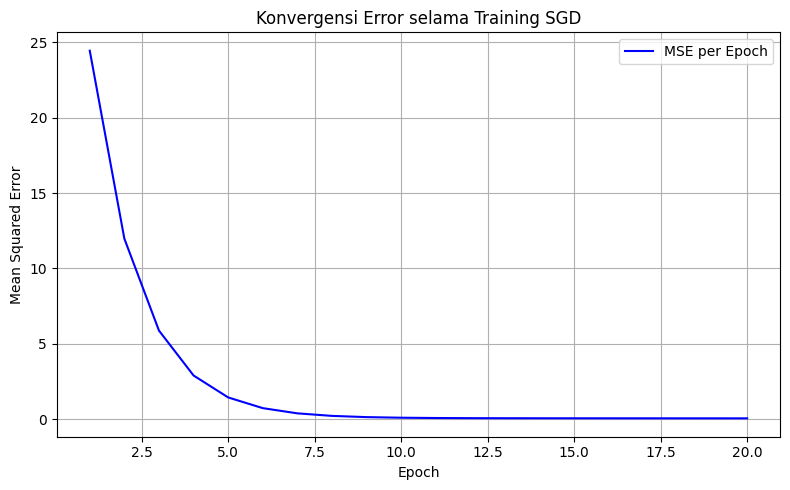

In [45]:
import matplotlib.pyplot as plt
# Plot grafik error
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), loss_history, label='MSE per Epoch', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Konvergensi Error selama Training SGD')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
import numpy as np

# 1. Prediksi untuk satu data point
def predict(X_i, w, b):
    return np.dot(X_i, w) + b

# 2. Hitung gradien dari satu data point
def compute_gradients(X_i, y_i, w, b):
    prediction = predict(X_i, w, b)
    error = prediction - y_i
    grad_w = error * X_i
    grad_b = error
    return grad_w, grad_b

# 3. Update parameter
def update_parameters(w, b, grad_w, grad_b, lr):
    w -= lr * grad_w
    b -= lr * grad_b
    return w, b

# 4. Fungsi utama SGD
def sgd(X, y, w, b, lr=0.01, epochs=10):
    for epoch in range(epochs):
        for i in range(len(X)):
            grad_w, grad_b = compute_gradients(X[i], y[i], w, b)
            w, b = update_parameters(w, b, grad_w, grad_b, lr)
        print(f"Epoch {epoch+1}: w = {w}, b = {b}")
    return w, b

# 5. Contoh data
X = np.array([[1.0], [2.0], [3.0], [4.0]])  # Fitur
y = np.array([2.0, 4.0, 6.0, 8.0])         # Target

# Inisialisasi parameter
w = np.array([0.0])  # bobot awal
b = 0.0              # bias awal

# Eksekusi SGD
final_w, final_b = sgd(X, y, w, b, lr=0.01, epochs=20)

print(f"\nFinal model: y = {final_w[0]:.2f} * x + {final_b:.2f}")

x_test = np.array([5.0])
y_pred = np.dot(x_test, final_w[0]) + final_b
print(f"Prediksi untuk x=5.0 adalah y={y_pred}")

Epoch 1: w = [0.54059216], b = 0.18395854
Epoch 2: w = [0.91923804], b = 0.311555062295151
Epoch 3: w = [1.18456003], b = 0.39971927498701265
Epoch 4: w = [1.37058158], b = 0.4602976707660593
Epoch 5: w = [1.50111054], b = 0.5015797710433028
Epoch 6: w = [1.59280646], b = 0.5293661127444029
Epoch 7: w = [1.65732681], b = 0.5477155702931231
Epoch 8: w = [1.70282892], b = 0.5594682929262241
Epoch 9: w = [1.73502088], b = 0.5666116292092931
Epoch 10: w = [1.75789692], b = 0.5705361821072628
Epoch 11: w = [1.77425202], b = 0.5722149830931029
Epoch 12: w = [1.78604197], b = 0.5723288689311937
Epoch 13: w = [1.79463534], b = 0.5713542138716885
Epoch 14: w = [1.80098981], b = 0.5696243201062575
Epoch 15: w = [1.80577552], b = 0.5673723756360046
Epoch 16: w = [1.80946141], b = 0.5647615139666785
Epoch 17: w = [1.81237564], b = 0.5619058483289714
Epoch 18: w = [1.81474784], b = 0.558885190337748
Epoch 19: w = [1.81673872], b = 0.5557553493479175
Epoch 20: w = [1.81846073], b = 0.552555339410131

CONTOH PREDIKSI HARGA RUMAH 
DATA
	LUAS TANAH(M2)	JUMLAH KAMAR	HARGA (JT)
1	60	2	300
2	80	3	450
3	100	3	500
4	120	4	600
5	140	4	750
6	160	5	800
7	180	5	950
8			

TUGAS PREDIKSI
	LUAS TANAH(M2)	JUMLAH KAMAR	HARGA (JT)
1	90	3	??
2	150	4	??
3	200	5	??


🧠 Penjelasan Singkat
- Fitur: [luas_tanah, jumlah_kamar]
- Target: harga
- Model: y=w_1⋅luas+w_2⋅kamar+b
- SGD: update bobot berdasarkan satu data per iterasi
- Prediksi: gunakan bobot dan bias hasil training


In [47]:
import numpy as np

# Untuk menyimpan error per epoch
loss_history = []

def train_sgd(X, y, learning_rate=0.0001, epochs=1000):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0
    
    for epoch in range(epochs):
        total_loss = 0  # Reset setiap epoch
        for i in range(n_samples):
            # Prediksi
            prediction = np.dot(X[i], w) + b
            # Error
            error = prediction - y[i]
            # Gradien
            grad_w = error * X[i]
            grad_b = error
            # Update parameter
            w -= learning_rate * grad_w
            b -= learning_rate * grad_b
            # Akumulasi squared error
            total_loss += error**2
        # Rata-rata error per epoch
        mse = total_loss / len(X)
        loss_history.append(mse)
    return w, b

def predict(X, w, b):
    return np.dot(X, w) + b

In [48]:
X_train = np.array([
    [60, 2],
    [80, 3],
    [100, 3],
    [120, 4],
    [140, 4],
    [160, 5],
    [180, 5]
])
y_train = np.array([300, 450, 500, 600, 750, 800, 950])

In [49]:
w, b = train_sgd(X_train, y_train, learning_rate=0.0001, epochs=1000)
print(f"Bobot: {w}, Bias: {b:.2f}")

Bobot: [  8.26454094 -19.82504908], Bias: -21.30


In [50]:
X_test = np.array([
    [90, 3],
    [150, 4],
    [200, 5]
])
y_pred = predict(X_test, w, b)

for i, harga in enumerate(y_pred):
    print(f"Prediksi rumah {i+1}: {harga:.2f} juta")

Prediksi rumah 1: 663.04 juta
Prediksi rumah 2: 1139.08 juta
Prediksi rumah 3: 1532.49 juta


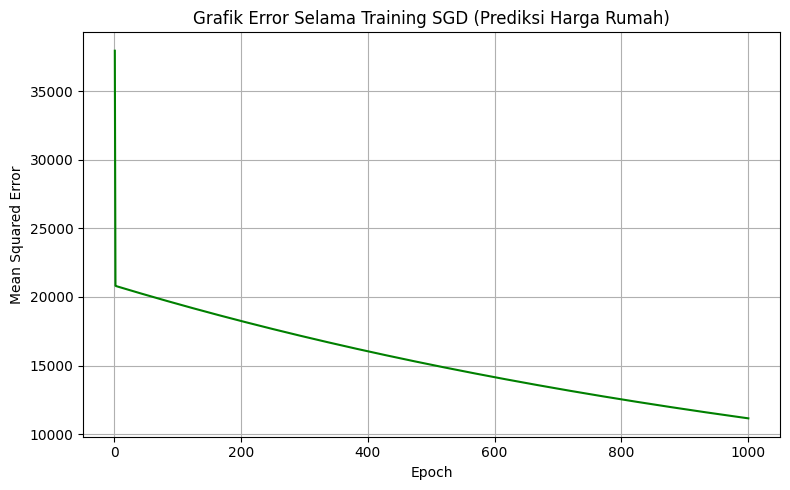

In [43]:
# Plot grafik error
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(loss_history)+1), loss_history, color='green')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Grafik Error Selama Training SGD (Prediksi Harga Rumah)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data harga rumah
X_train = np.array([
    [60, 2],
    [80, 3],
    [100, 3],
    [120, 4],
    [140, 4],
    [160, 5],
    [180, 5]
])
y_train = np.array([300, 450, 500, 600, 750, 800, 950])

# Normalisasi fitur
def min_max_normalize(X):
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    return (X - X_min) / (X_max - X_min), X_min, X_max

X_train_norm, X_min, X_max = min_max_normalize(X_train)

# Untuk menyimpan error per epoch
loss_history = []

def train_sgd(X, y, learning_rate=0.01, epochs=1000):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0

    for epoch in range(epochs):
        total_loss = 0
        for i in range(n_samples):
            prediction = np.dot(X[i], w) + b
            error = prediction - y[i]
            grad_w = error * X[i]
            grad_b = error
            w -= learning_rate * grad_w
            b -= learning_rate * grad_b
            total_loss += error**2
        mse = total_loss / n_samples
        loss_history.append(mse)
    return w, b

def predict(X, w, b):
    return np.dot(X, w) + b

# Training
w, b = train_sgd(X_train_norm, y_train, learning_rate=0.01, epochs=1000)

# Plot grafik error
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(loss_history)+1), loss_history, color='purple')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Grafik Error Selama Training SGD (Harga Rumah, Fitur Dinormalisasi)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
X_test = np.array([
    [90, 3],
    [150, 4],
    [200, 5]
])
X_test_norm = (X_test - X_min) / (X_max - X_min)
y_pred = predict(X_test_norm, w, b)

for i, harga in enumerate(y_pred):
    print(f"Prediksi rumah {i+1}: {harga:.2f} juta")
